**ML ASSIGNMENT 2**

**Forecasting Monthly Sales Using Regression and Smoothing**

**DRASHTI VAGHELA**

**N01650888**

**DATA EXPLORATION**

a. Load the dataset and plot the time series of monthly sales.

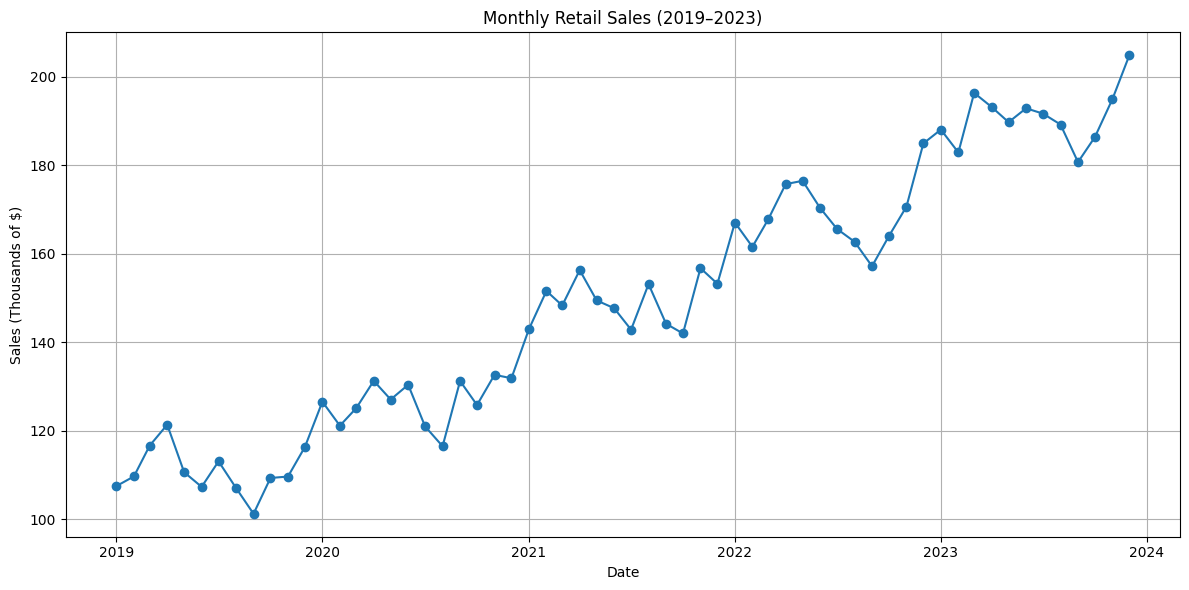

In [18]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load dataset
df = pd.read_csv('monthly_retail_sales.csv')
# Convert 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])
# Set 'Month' as the index of the DataFrame
df.set_index('Month', inplace=True)

# Plot monthly sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title('Monthly Retail Sales (2019–2023)')
plt.xlabel('Date')
plt.ylabel('Sales (Thousands of $)')
plt.grid(True)
plt.tight_layout()
plt.show()

b. Describe any patterns you observe (trend, seasonality, noise).



1.  There is a clear upward trend in sales over the 5-year period, indicating consistent business growth.
2.  There is noticable recurring seasonal peaks, often around the same time each year—likely due to holidays or promotional cycles.
3. Although trends and seasons are clear, there's still some irregular variation in sales from month to month, possibly due to:

  a) External events (e.g., market changes, supply chain issues)

  b) Promotions or campaigns

  c) Random consumer behavior shifts



**REGRESSION-BASED FORECASTING**

a. Create a new column representing time as a numeric variable (e.g., 1 for Jan 2019, 2 for Feb 2019, …).

In [19]:
# Create a new column 'TimeIndex' as a sequential number starting from 1 up to the length of the dataset
df['TimeIndex'] = range(1, len(df) + 1)
# Display the first 5 rows to verify the new column was added correctl
print(df.head())

             Sales  TimeIndex
Month                        
2019-01-01  107.48          1
2019-02-01  109.66          2
2019-03-01  116.63          3
2019-04-01  121.36          4
2019-05-01  110.61          5


b. Fit a simple linear regression model to predict Sales using time.

In [22]:
# Prepare features and target
X = df[['TimeIndex']]  # independent variable (time)
y = df['Sales']        # dependent variable (sales)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict sales using the fitted model
df['Predicted_Sales'] = model.predict(X)

# View first few predictions
print(df[['TimeIndex', 'Sales', 'Predicted_Sales']].head())

            TimeIndex   Sales  Predicted_Sales
Month                                         
2019-01-01          1  107.48       101.166650
2019-02-01          2  109.66       102.795803
2019-03-01          3  116.63       104.424956
2019-04-01          4  121.36       106.054110
2019-05-01          5  110.61       107.683263


c. Plot the regression line over the actual sales.

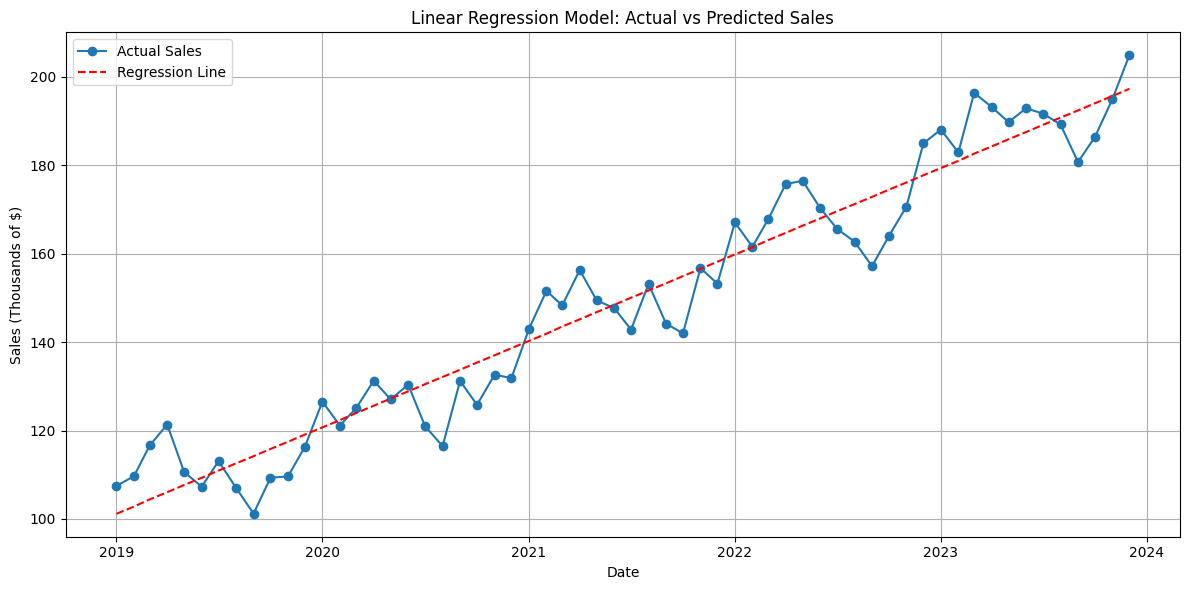

In [23]:
# Plot actual sales and predicted sales from the regression model to compare their trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales', marker='o')
plt.plot(df.index, df['Predicted_Sales'], label='Regression Line', linestyle='--', color='red')
plt.title('Linear Regression Model: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales (Thousands of $)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

d. Forecast the next 6 months and provide values.

In [24]:
# Forecast for next 6 months
future_time_index = np.arange(df['TimeIndex'].max() + 1, df['TimeIndex'].max() + 7).reshape(-1, 1)

# Predict sales for future time indexes
future_sales = model.predict(future_time_index)

# Generate corresponding future dates
last_month = df.index[-1]
future_dates = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=6, freq='MS')

# Create forecast DataFrame
future_forecast = pd.DataFrame({
    'Month': future_dates,
    'Forecasted_Sales': future_sales
})

print(future_forecast)

       Month  Forecasted_Sales
0 2024-01-01        198.915836
1 2024-02-01        200.544989
2 2024-03-01        202.174142
3 2024-04-01        203.803295
4 2024-05-01        205.432449
5 2024-06-01        207.061602


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


e. Calculate MAE and RMSE between the actual and predicted values for the last 12 months of the dataset.

In [25]:
# Filter last 12 months of actual and predicted sales
last_12_actual = df['Sales'][-12:]
last_12_predicted = df['Predicted_Sales'][-12:]

# Calculate MAE
mae = np.mean(np.abs(last_12_actual - last_12_predicted))

# Calculate RMSE
rmse = np.sqrt(np.mean((last_12_actual - last_12_predicted) ** 2))

print(f"MAE for last 12 months: {mae:.2f}")
print(f"RMSE for last 12 months: {rmse:.2f}")

MAE for last 12 months: 6.18
RMSE for last 12 months: 7.38


**SMOOTHING-BASED FORECASTING**

a. Apply a 12-month Moving Average. Plot the smoothed curve along with original data.

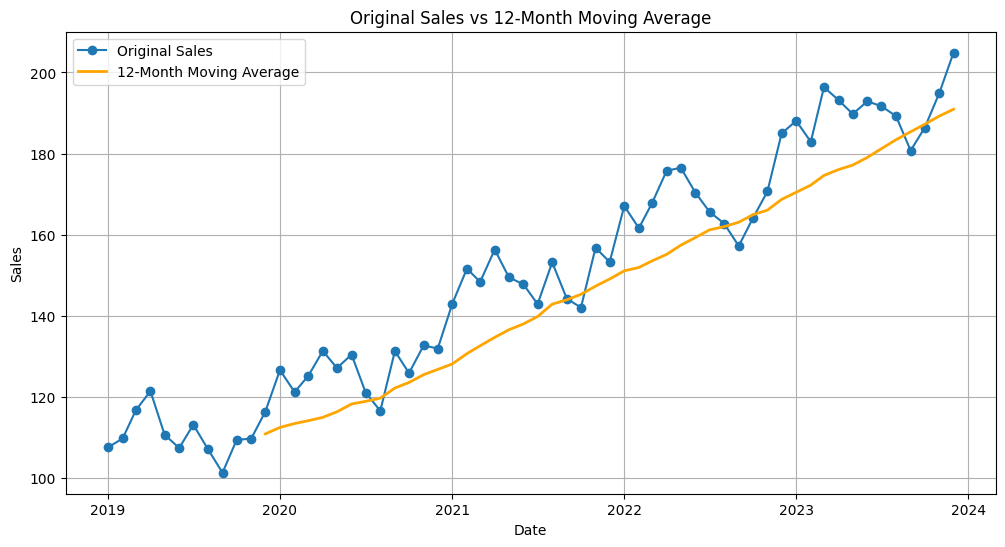

In [26]:
# Calculate 12-month moving average
df['MA_12'] = df['Sales'].rolling(window=12).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'], label='Original Sales', marker='o')
plt.plot(df.index, df['MA_12'], label='12-Month Moving Average', color='orange', linewidth=2)
plt.title('Original Sales vs 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

b. Apply Simple Exponential Smoothing. Experiment with α values = 0.2, 0.5, and 0.8. Plot all three and compare visually.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


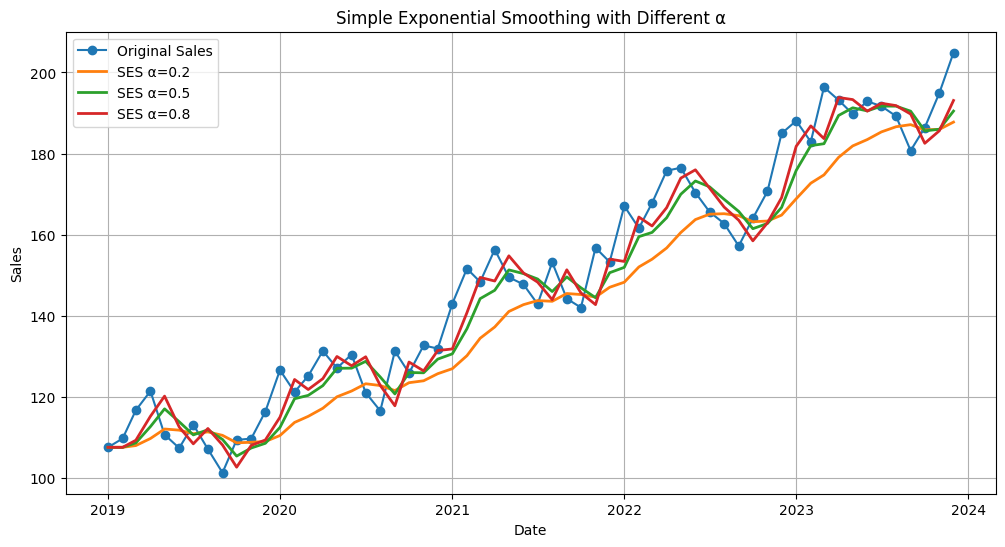

In [27]:
# SES for different alphas
alphas = [0.2, 0.5, 0.8]
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'], label='Original Sales', marker='o')

for alpha in alphas:
    model = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=alpha, optimized=False)
    df[f'SES_alpha_{alpha}'] = model.fittedvalues
    plt.plot(df.index, df[f'SES_alpha_{alpha}'], label=f'SES α={alpha}', linewidth=2)

plt.title('Simple Exponential Smoothing with Different α')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


c. Forecast the next 6 months using the best α.

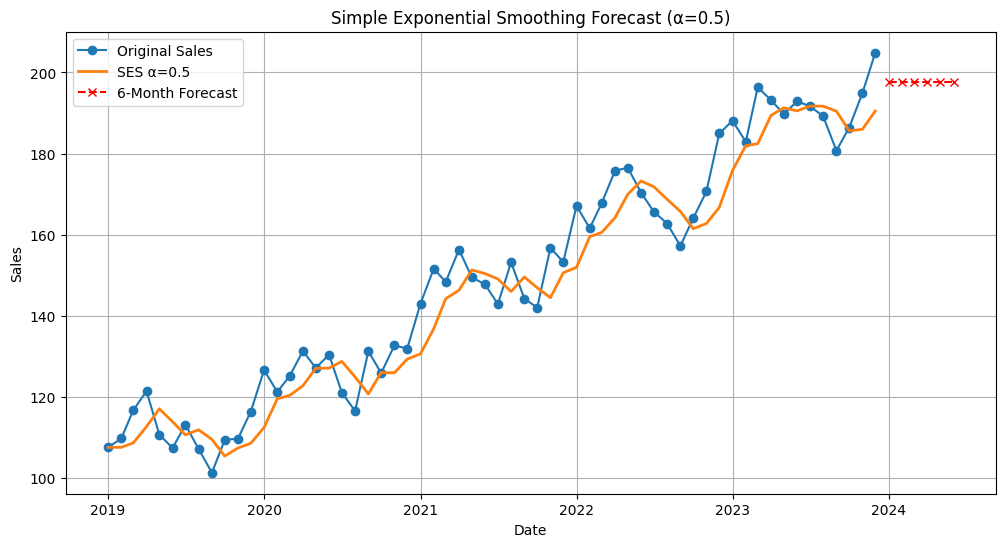

2024-01-01    197.678509
2024-02-01    197.678509
2024-03-01    197.678509
2024-04-01    197.678509
2024-05-01    197.678509
2024-06-01    197.678509
Freq: MS, dtype: float64


In [37]:
best_alpha = 0.5  # Based on the previous plot
df.index.freq = 'MS'

# Fit model on entire data
model = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=best_alpha, optimized=False)
df['SES_Fitted_Sales'] = model.fittedvalues
# Forecast next 6 months
forecast = model.forecast(6)

# Generate future dates
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'], label='Original Sales', marker='o')
plt.plot(df.index, model.fittedvalues, label=f'SES α={best_alpha}', linewidth=2)
plt.plot(future_dates, forecast, label='6-Month Forecast', marker='x', linestyle='--', color='red')
plt.title(f'Simple Exponential Smoothing Forecast (α={best_alpha})')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print(forecast)

In [38]:
ses_pred = df['SES_Fitted_Sales'][-12:]
reg_pred = df['Predicted_Sales'][-12:]
actual = df['Sales'][-12:]

# Calculate errors
def calculate_errors(actual, predicted):
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(np.mean((actual - predicted)**2))
    return mae, rmse

mae_reg, rmse_reg = calculate_errors(actual, reg_pred)
mae_ses, rmse_ses = calculate_errors(actual, ses_pred)

print(f"Regression MAE: {mae_reg:.2f}, RMSE: {rmse_reg:.2f}")
print(f"SES MAE: {mae_ses:.2f}, RMSE: {rmse_ses:.2f}")

Regression MAE: 6.18, RMSE: 7.38
SES MAE: 5.94, RMSE: 7.94


**ANALYSIS**

**a. Which method gives more accurate forecasts for this dataset?**

SES has a lower MAE, meaning on average, its predictions are closer to actual values in absolute terms.

Regression has a lower RMSE, meaning it penalizes large errors less than SES on this dataset.

Overall, SES is slightly more accurate in average error (MAE), but regression performs better in terms of penalizing larger errors (RMSE).

**b. What might be limitations of each method?**

Regression:

1. Assumes a linear relationship over time — which may not hold if sales have seasonality, trends, or other patterns.

2. Doesn’t model seasonality or irregular fluctuations well.

3. Sensitive to outliers affecting the line fit.

Simple Exponential Smoothing:

1. Assumes no trend or seasonality (only smooths level), which may limit performance if data has strong seasonal patterns or trends.

2. Choice of smoothing parameter α greatly influences performance and can be unstable if chosen poorly.

3. May lag behind rapid changes because it gives exponentially decreasing weight to older observations.

**c. Suggest improvements or further modeling strategies.**



1. Incorporate Seasonality and Trend. Use Holt’s Linear Trend method (adds trend smoothing) or Holt-Winters Exponential Smoothing (models seasonality + trend).
2. Random Forests, Gradient Boosting, or Neural Networks with lagged features, calendar variables (months, holidays), and external factors may caputure nonlinear relationships and complex patterns better.
3. Use cross-validation for time series to evaluate forecast accuracy on multiple validation sets which helps choose best model and parameters more reliably..

